In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sms
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from google.colab import files
upload = files.upload()


Saving Car_sales.csv to Car_sales.csv


In [2]:
ds=pd.read_csv("Car_sales.csv")

In [3]:
ds.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [5]:
ds.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [6]:
ds.isnull().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

In [7]:
ds = ds.dropna()
ds.isnull().sum()

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
dtype: int64

In [10]:
ds.shape

(117, 16)

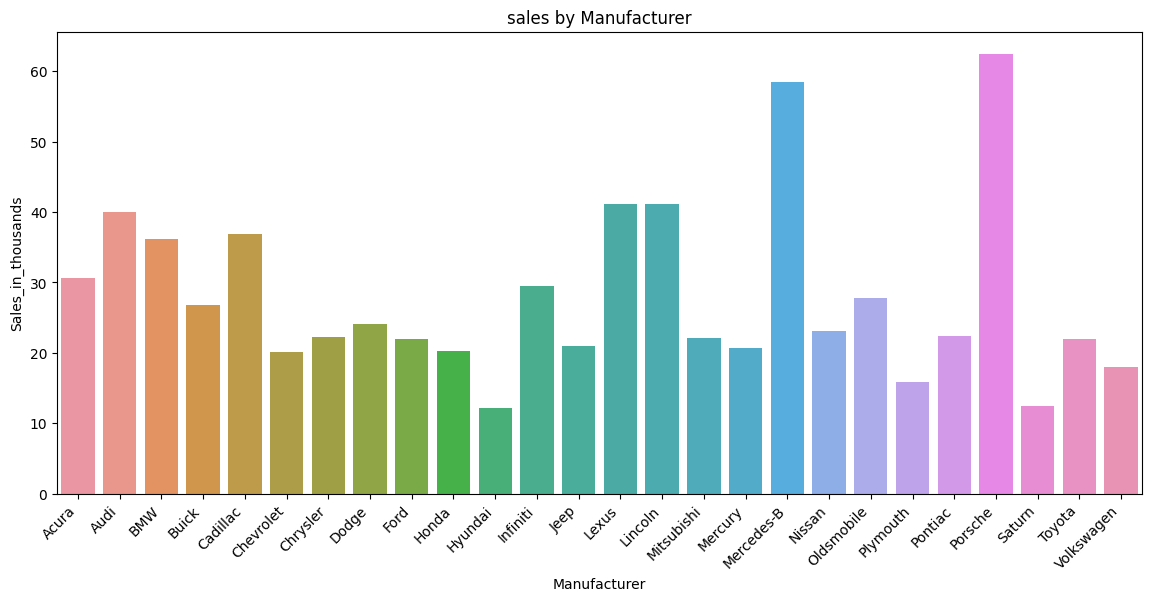

In [11]:
plt.figure(figsize=(14, 6))
sns.barplot(x='Manufacturer', y='Price_in_thousands', data=ds, errorbar=None)
plt.title('sales by Manufacturer')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Manufacturer')
plt.ylabel('Sales_in_thousands')
plt.show()

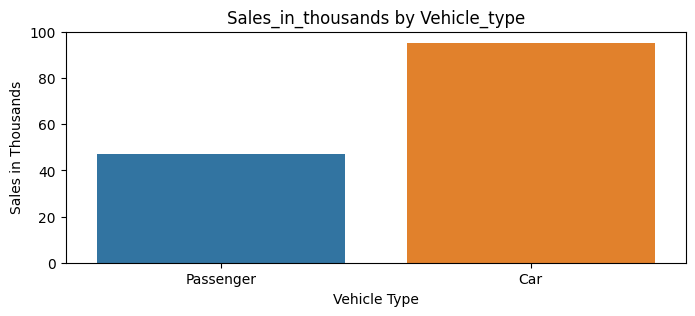

In [12]:
plt.figure(figsize=(8, 3))
sns.barplot(x='Vehicle_type', y='Sales_in_thousands', data=ds, errorbar=None)
plt.title('Sales_in_thousands by Vehicle_type')
plt.xlabel('Vehicle Type')
plt.ylabel('Sales in Thousands')
plt.show()

Text(0.5, 1.0, 'Price_in_thousands vs Engine_size')

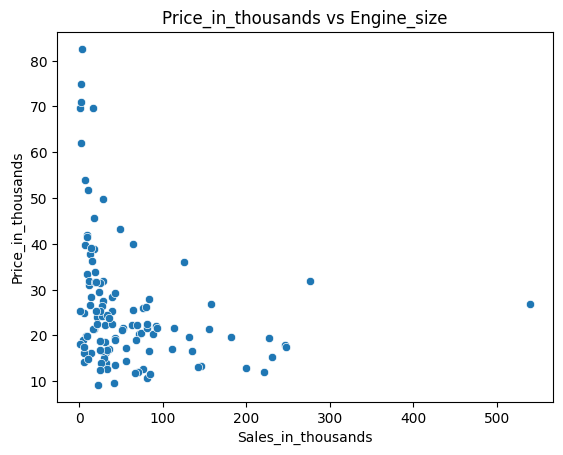

In [13]:
sns.scatterplot(x='Sales_in_thousands', y='Price_in_thousands', data=ds)
plt.title('Price_in_thousands vs Engine_size')

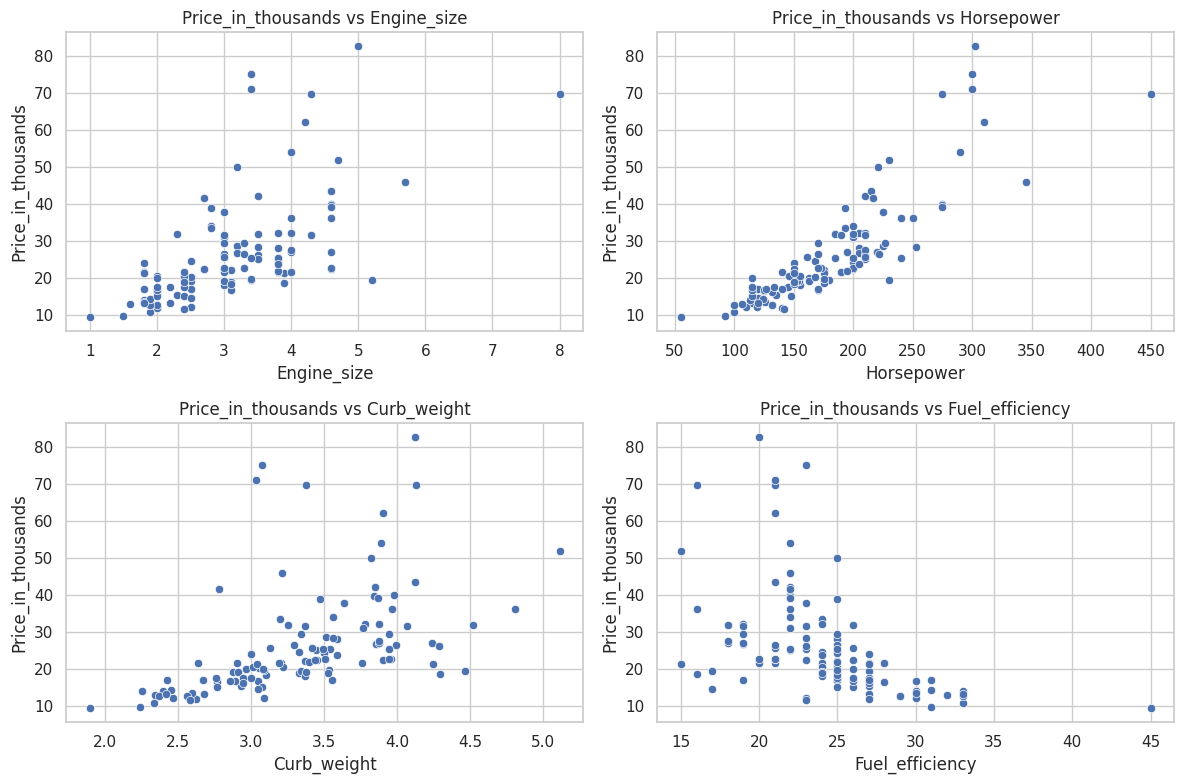

In [14]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x='Engine_size', y='Price_in_thousands', data=ds)
plt.title('Price_in_thousands vs Engine_size')

plt.subplot(2, 2, 2)
sns.scatterplot(x='Horsepower', y='Price_in_thousands', data=ds)
plt.title('Price_in_thousands vs Horsepower')

plt.subplot(2, 2, 3)
sns.scatterplot(x='Curb_weight', y='Price_in_thousands', data=ds)
plt.title('Price_in_thousands vs Curb_weight')

plt.subplot(2, 2, 4)
sns.scatterplot(x='Fuel_efficiency', y='Price_in_thousands', data=ds)
plt.title('Price_in_thousands vs Fuel_efficiency')

plt.tight_layout()
plt.show()

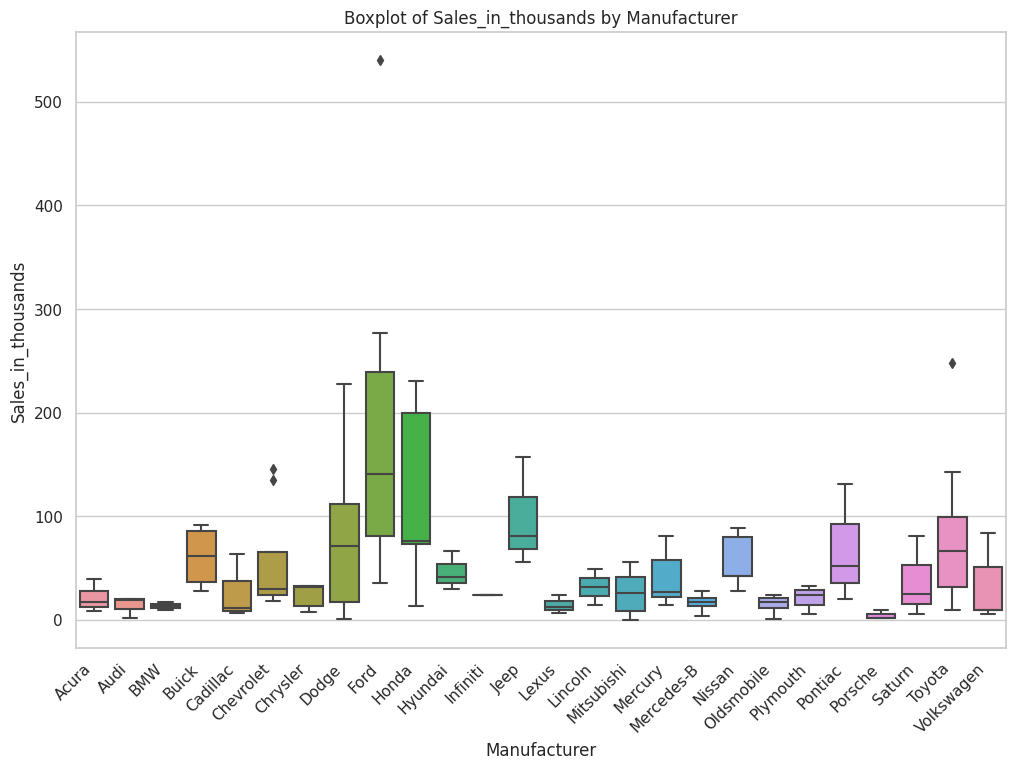

In [15]:
plt.figure(figsize=(12, 8))
bp = sns.boxplot(y='Sales_in_thousands', x='Manufacturer', data=ds)
plt.title('Boxplot of Sales_in_thousands by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Sales_in_thousands')
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-16-a34d9ecc1237>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = ds.corr()


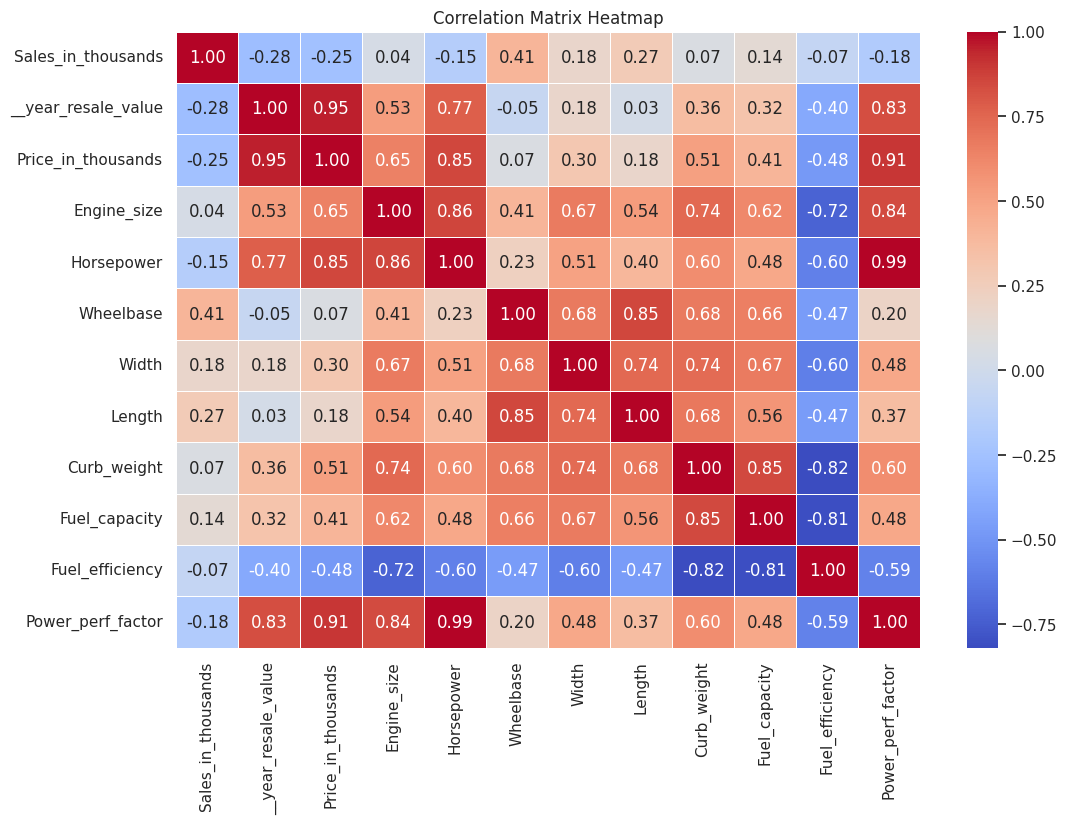

In [16]:
correlation_matrix = ds.corr()
sns.set(style="white")

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [19]:
x_list_new = ds[['__year_resale_value','Wheelbase','Width','Length','Curb_weight','Fuel_capacity','Fuel_efficiency']]
x = x_list_new
y = ds[["Price_in_thousands"]]
x = sms.add_constant(x)
model = sms.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     Price_in_thousands   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     316.8
Date:                Sat, 02 Dec 2023   Prob (F-statistic):           2.26e-69
Time:                        16:48:46   Log-Likelihood:                -296.47
No. Observations:                 117   AIC:                             608.9
Df Residuals:                     109   BIC:                             631.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -16.7024    

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [21]:
y_pred = model.predict(x_test)


In [22]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 8.08142492429427
R-squared: 0.8832362856563666
